## Plotting the circuit to execute the SWAP operation for one or more iteration

We propose the usage of Heisenberg evolution to perform the 2 qubit SWAP gate for duration $\delta t$ using the ZZ gate. By applying two Hadamard gates onto each qubit, we can get the XX gate:
\begin{align}
    &(H \otimes H) e^{-itZ\otimes Z} (H \otimes H) \\
    = &e^{-it(H \otimes H)(Z\otimes Z)(H \otimes H)} = e^{-itX\otimes X}
\end{align}

Similarly, we can achieve the YY gate by applying $S^\dagger$ gate followed by Hadamard gate:
\begin{align}
    & (SH \otimes SH) e^{-itZ\otimes Z}  [(H S^\dagger) \otimes (H S^\dagger)] \\
    = &e^{-it(SH \otimes SH)(Z\otimes Z)[(H S^\dagger) \otimes (H S^\dagger)]} = e^{-itY\otimes Y}
\end{align}

Because ZZ, YY and XX commute, we can achieve the SWAP operation by doing:
\begin{align}
    e^{-itSWAP} &=e^{-it(Z\otimes Z + Y\otimes Y + X\otimes X)}\\
    &= e^{-itZ\otimes Z}e^{-itY\otimes Y}e^{-itX\otimes X}\\
    &= e^{-itZ\otimes Z} (SH \otimes SH) e^{-itZ\otimes Z}
    [(H S^\dagger) \otimes (H S^\dagger)]
    (H \otimes H) e^{-itZ\otimes Z} (H \otimes H) \\
    &= e^{-itZ\otimes Z} (SH \otimes SH) e^{-itZ\otimes Z}
    [(HS^\dagger H) \otimes (HS^\dagger H)] e^{-itZ\otimes Z} (H \otimes H)
\end{align}

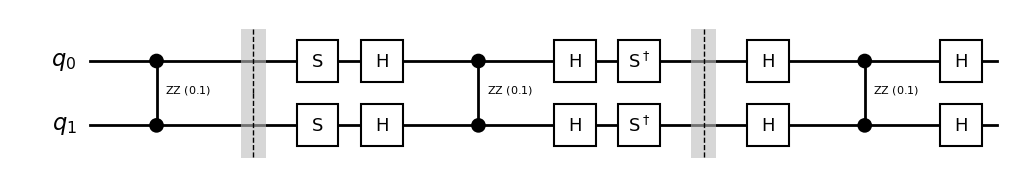

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RZZGate

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

delta = 0.1  # Angle in radians

# ZZ
qc.append(RZZGate(delta), [0, 1])
qc.barrier()

# YY
qc.s(0)
qc.s(1)
qc.h(0)
qc.h(1)
qc.append(RZZGate(delta), [0, 1])
qc.h(0)
qc.h(1)
qc.sdg(0)
qc.sdg(1)
qc.barrier()

# XX
qc.h(0)
qc.h(1)
qc.append(RZZGate(delta), [0, 1])
qc.h(0)
qc.h(1)

# Draw the circuit
qc.draw(output='mpl',style="bw")


Here we draw an example circuit with 4 qubits - 1 work qubit and 3 memory qubits. 
Change `num_qubits` to change the total number of qubits.

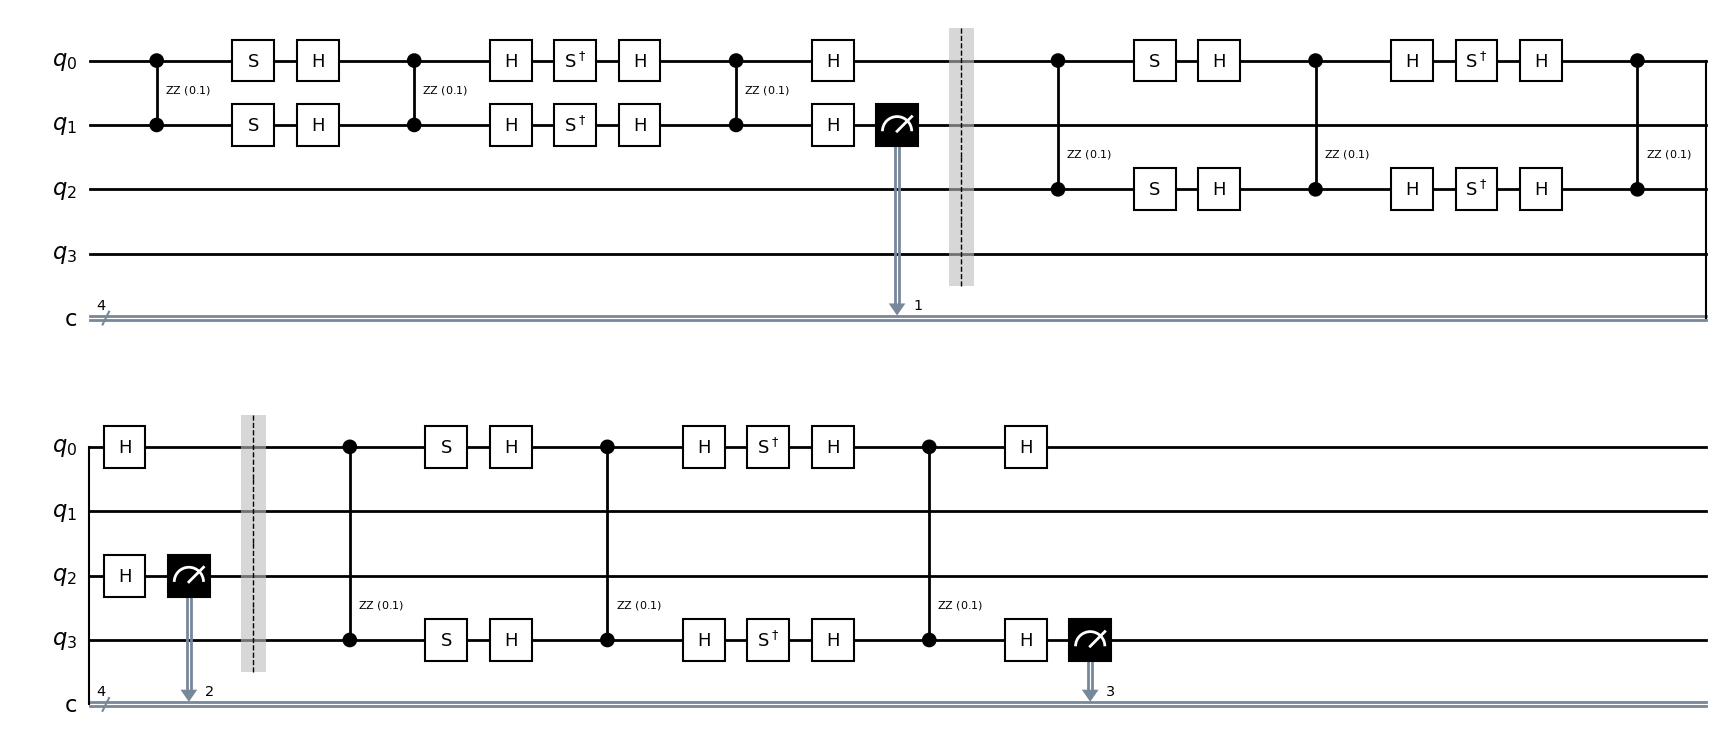

In [2]:
# Create a quantum circuit with two qubits
num_qubits = 4
qc = QuantumCircuit(num_qubits,num_qubits)

delta = 0.1  # Angle in radians

for memory_qubit in range(1,num_qubits,1):
    # ZZ
    qc.append(RZZGate(delta), [0, memory_qubit])
    # YY
    qc.s(0)
    qc.s(memory_qubit)
    qc.h(0)
    qc.h(memory_qubit)
    qc.append(RZZGate(delta), [0, memory_qubit])
    qc.h(0)
    qc.h(memory_qubit)
    qc.sdg(0)
    qc.sdg(memory_qubit)
    ## XX
    qc.h(0)
    qc.h(memory_qubit)
    qc.append(RZZGate(delta), [0, memory_qubit])
    qc.h(0)
    qc.h(memory_qubit)
    qc.measure(memory_qubit,memory_qubit)
    if memory_qubit<3:
        qc.barrier()


# Draw the circuit
qc.draw(output='mpl',style="bw")